In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_stories = pd.read_csv('stories.csv', '\n')
df_stories.head()

processedData = list(df_stories["col"]) 

In [4]:

df_vectors = pd.read_csv('ELMo_sentence_embedding.csv', ',') # change this file name §§§§


df_vectors.head()
# print(df_vectors.shape)GloVe_skipgram

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.376887,-0.226282,-0.018494,-0.050803,0.176113,0.278445,-0.228455,-0.342923,0.187837,-0.069234,-0.217905,-0.250442,-0.554745,0.394732,0.053984,0.202535,0.460802,0.161488,-0.376393,-0.265685,0.130094,0.111223,-0.091995,-0.114306,0.510853,-0.080852,0.085665,0.238843,0.056960,-0.031059,-0.107521,-0.072831,-0.036902,-0.333365,0.047340,0.099617,-0.004672,-0.136590,0.183550,0.446744,...,0.575144,0.369522,0.090428,0.275961,-0.009794,-0.377338,-0.060222,0.323715,0.062293,-0.225109,0.002029,-0.030184,-0.179806,-0.135453,-0.171616,0.193711,-0.169506,0.429598,0.245164,0.278181,0.009761,-0.027467,-0.175020,-0.413809,-0.464315,0.186592,0.158597,-0.240691,0.020538,-0.019120,-0.322208,-0.011207,0.254086,0.327920,0.218422,0.163968,-0.036053,0.054643,0.438330,0.039643
1,0.343115,-0.275429,-0.124417,-0.106612,0.231697,0.410736,-0.044570,-0.383085,0.245348,-0.211522,-0.378723,-0.204125,-0.495398,0.031448,0.167839,0.393907,0.449251,-0.136158,-0.449389,-0.131507,0.176347,0.063665,0.174050,-0.101384,0.206779,-0.127145,-0.110658,0.263743,0.355449,0.106758,-0.251592,0.030445,-0.131320,-0.168182,-0.315701,-0.014880,-0.133481,0.024168,0.094282,0.405732,...,0.297215,0.298201,-0.040438,0.380518,-0.048084,-0.212386,0.224159,-0.083787,0.156929,0.015248,-0.355591,-0.035637,0.027914,-0.010702,0.286713,-0.029660,-0.298878,0.388815,0.399343,0.125462,0.034213,-0.048166,-0.470687,-0.652100,-0.350802,0.241285,0.024149,-0.222347,-0.103090,-0.323809,-0.348660,0.102462,-0.104931,0.210221,0.255064,0.184043,0.292247,0.164707,0.343790,0.180673
2,0.277449,-0.268445,0.120236,0.038573,0.077695,0.450241,-0.196959,-0.158228,0.083294,-0.143263,-0.389145,-0.198989,-0.486599,0.128404,-0.012942,0.085945,0.457515,0.214568,-0.438306,-0.068304,0.524169,-0.039387,0.204646,-0.093223,0.350956,-0.153074,0.119485,0.034893,0.028963,0.283589,0.145498,0.020616,0.026664,-0.350447,-0.055104,0.137834,-0.064417,-0.124216,0.315513,0.251534,...,0.529119,0.217255,0.002213,0.384645,0.082967,-0.521736,-0.023386,0.306706,-0.058004,-0.235816,-0.165074,-0.008277,-0.042366,-0.211794,-0.038625,0.244133,-0.075249,0.348641,0.439206,0.264002,0.081087,-0.067329,-0.163817,-0.544327,-0.347303,0.096052,0.111710,-0.191316,-0.026432,-0.133299,-0.351872,0.136362,0.292721,0.268283,0.184008,0.133993,0.119610,-0.038201,0.348057,0.043121
3,0.303542,-0.238747,-0.123755,0.019605,0.230953,0.464029,-0.237657,-0.206323,0.434544,-0.110668,-0.438587,-0.111957,-0.493324,0.348666,0.006290,0.179719,0.222184,-0.048198,-0.427168,-0.124902,0.308688,-0.025848,0.171555,0.110431,0.486581,-0.072312,0.039991,-0.202233,0.298266,0.671453,-0.328914,0.233662,0.130391,-0.259677,-0.363531,0.120090,-0.070772,-0.012159,0.240692,0.346930,...,0.439010,0.291642,0.240755,0.462931,0.034320,-0.297971,0.205486,0.108358,-0.011387,-0.116791,-0.338942,-0.007862,0.165100,-0.175389,0.070237,0.240907,0.024830,0.352989,0.161660,0.243082,0.116988,-0.010155,-0.294430,-0.391268,-0.288617,0.266820,0.063768,-0.297900,-0.020220,-0.247616,-0.165140,0.159338,0.008567,0.242150,0.400759,0.081636,0.060171,-0.043970,0.237852,-0.002756
4,0.354517,-0.329299,-0.127377,-0.070848,0.086109,0.431679,-0.044640,-0.000883,0.416327,-0.343180,-0.404909,-0.088891,-0.687949,0.508408,0.076592,0.300343,0.336465,-0.042676,-0.303249,0.048289,0.270335,-0.019846,0.186858,-0.170321,0.342566,0.060958,-0.014879,0.285401,0.177407,0.408862,-0.091419,0.177316,0.078188,-0.302188,-0.247661,0.086825,-0.156839,-0.036033,0.240084,0.393727,...,0.364160,0.067426,0.008399,0.326675,-0.162026,-0.147655,0.159067,-0.038736,-0.053415,0.005111,-0.416332,-0.153169,-0.037576,-0.077035,0.194650,0.072400,-0.293720,0.563466,0.228755,0.274533,0.178808,-0.147080,-0.219152,-0.540634,-0.407643,0.222458,-0.002369,-0.180

In [5]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df_vectors)
data_scaled = pd.DataFrame(data_scaled, columns= df_vectors.columns)
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.042090,-0.025271,-0.002065,-0.005674,0.019668,0.031096,-0.025513,-0.038297,0.020977,-0.007732,-0.024335,-0.027969,-0.061953,0.044083,0.006029,0.022619,0.051462,0.018035,-0.042035,-0.029671,0.014529,0.012421,-0.010274,-0.012765,0.057051,-0.009029,0.009567,0.026674,0.006361,-0.003469,-0.012008,-0.008134,-0.004121,-0.037230,0.005287,0.011125,-0.000522,-0.015254,0.020499,0.049892,...,0.064231,0.041268,0.010099,0.030819,-0.001094,-0.042141,-0.006726,0.036152,0.006957,-0.025140,0.000227,-0.003371,-0.020080,-0.015127,-0.019166,0.021633,-0.018930,0.047977,0.027380,0.031067,0.001090,-0.003067,-0.019546,-0.046214,-0.051854,0.020838,0.017712,-0.026880,0.002294,-0.002135,-0.035984,-0.001252,0.028376,0.036622,0.024393,0.018312,-0.004026,0.006102,0.048952,0.004427
1,0.035631,-0.028602,-0.012920,-0.011071,0.024060,0.042653,-0.004628,-0.039781,0.025478,-0.021965,-0.039328,-0.021197,-0.051444,0.003266,0.017429,0.040905,0.046652,-0.014139,-0.046667,-0.013656,0.018313,0.006611,0.018074,-0.010528,0.021473,-0.013203,-0.011491,0.027388,0.036911,0.011086,-0.026127,0.003162,-0.013637,-0.017465,-0.032784,-0.001545,-0.013861,0.002510,0.009791,0.042133,...,0.030864,0.030967,-0.004199,0.039515,-0.004993,-0.022055,0.023278,-0.008701,0.016296,0.001583,-0.036926,-0.003701,0.002899,-0.001111,0.029774,-0.003080,-0.031037,0.040376,0.041470,0.013029,0.003553,-0.005002,-0.048878,-0.067717,-0.036429,0.025056,0.002508,-0.023090,-0.010705,-0.033626,-0.036206,0.010640,-0.010897,0.021830,0.026487,0.019112,0.030348,0.017104,0.035701,0.018762
2,0.029502,-0.028545,0.012785,0.004102,0.008262,0.047876,-0.020943,-0.016825,0.008857,-0.015234,-0.041380,-0.021159,-0.051742,0.013654,-0.001376,0.009139,0.048650,0.022816,-0.046607,-0.007263,0.055737,-0.004188,0.021761,-0.009913,0.037319,-0.016277,0.012705,0.003710,0.003080,0.030155,0.015471,0.002192,0.002835,-0.037265,-0.005859,0.014656,-0.006850,-0.013208,0.033550,0.026747,...,0.056264,0.023102,0.000235,0.040901,0.008822,-0.055478,-0.002487,0.032613,-0.006168,-0.025075,-0.017553,-0.000880,-0.004505,-0.022521,-0.004107,0.025960,-0.008002,0.037073,0.046703,0.028072,0.008622,-0.007159,-0.017419,-0.057881,-0.036930,0.010214,0.011879,-0.020344,-0.002811,-0.014174,-0.037416,0.014500,0.031126,0.028528,0.019566,0.014248,0.012719,-0.004062,0.037010,0.004585
3,0.033267,-0.026166,-0.013563,0.002149,0.025312,0.050856,-0.026046,-0.022612,0.047624,-0.012129,-0.048068,-0.012270,-0.054067,0.038213,0.000689,0.019697,0.024351,-0.005282,-0.046816,-0.013689,0.033831,-0.002833,0.018802,0.012103,0.053328,-0.007925,0.004383,-0.022164,0.032689,0.073589,-0.036048,0.025609,0.014290,-0.028460,-0.039842,0.013161,-0.007756,-0.001333,0.026379,0.038022,...,0.048114,0.031963,0.026386,0.050736,0.003761,-0.032657,0.022521,0.011876,-0.001248,-0.012800,-0.037147,-0.000862,0.018094,-0.019222,0.007698,0.026403,0.002721,0.038686,0.017717,0.026641,0.012821,-0.001113,-0.032269,-0.042882,-0.031631,0.029243,0.006989,-0.032649,-0.002216,-0.027138,-0.018099,0.017463,0.000939,0.026539,0.043922,0.008947,0.006595,-0.004819,0.026068,-0.000302
4,0.038994,-0.036220,-0.014010,-0.007793,0.009471,0.047481,-0.004910,-0.000097,0.045793,-0.037747,-0.044537,-0.009777,-0.075669,0.055921,0.008425,0.033035,0.037009,-0.004694,-0.033355,0.005311,0.029735,-0.002183,0.020553,-0.018734,0.037680,0.006705,-0.001637,0.031392,0.019513,0.044972,-0.010055,0.019503,0.008600,-0.033238,-0.027241,0.009550,-0.017251,-0.003963,0.026407,0.043307,...,0.040055,0.007416,0.000924,0.035932,-0.017822,-0.016241,0.017496,-0.004261,-0.005875,0.000562,-0.045793,-0.016847,-0.004133,-0.008473,0.021410,0.007963,-0.032307,0.061977,0.025161,0.030196,0.019668,-0.016178,-0.024105,-0.059465,-0.044838,0.024469,-0.000261,-0.019

In [6]:
import pandas as pd
wiki_lst=[]
title=[]
for story_index, data in enumerate(processedData):
    wiki_lst.append(data)
    title.append(story_index)
print("examine content")
wiki_lst

examine content


['wasnt gas passed smell comparison rotten eggs reason memorable source smell coming mouth small room full people assumed someone released gas embarrassed fess real source needless say called mom come get left quickly could sure figured source gone longer smelled like',
 'foul litter box whenever walked brothers apartment smell hit immediately entire living room filled smell urine feces lesser extent whole apartment smell emanated gigantic red litter pan sitting right beside entranceway unfortunately brothers roommate four adorable cats could never keep litter pan clean smell deadened senses made feel bit dizzy urine strong smelled like noxious mix chemicals smiled tried gag cats cute stink certainly didnt mention later knew fault helped drag belongings tried breathe mouth inhale eventually left room order keep retching still like cats vow never let cats litter pan stink terribly',
 'cant smell tonight coworker fart office left left came window made sniffing gesture ask smelled yet act

##Clustering without doing PCA 

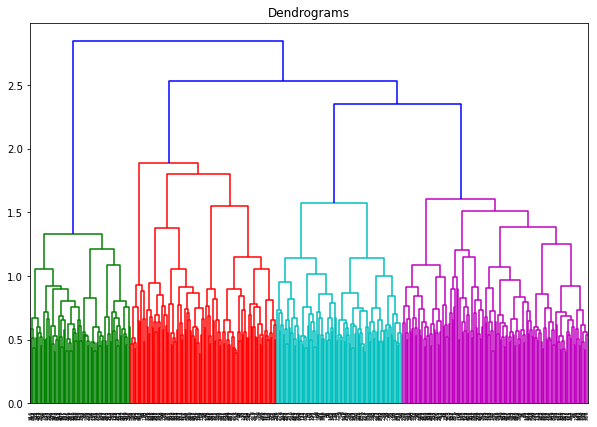

In [7]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

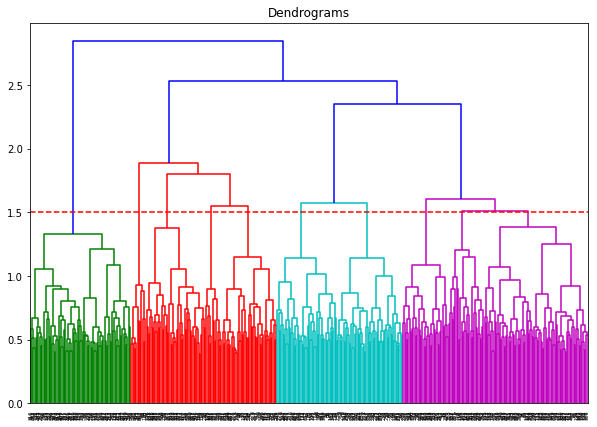

In [8]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1.5, color='r', linestyle='--')

In [9]:
#TRYING THREE CLUSTERS
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(data_scaled)
labels
print(len(labels))

439


In [10]:
labels
import csv
with open('clusters_4_ELMO_without_PCA.csv', mode='w') as clusters:
  cluster_writer = csv.writer(clusters, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  for story_index, label in enumerate(labels): 
    cluster_writer.writerow([df_stories.iloc[story_index][0], label])


##Clustering with PCA

In [11]:
#Trying to do PCA first on the data 

df_PCA_vectors = pd.read_csv('ELMo_sentence_embedding.csv', ',') # change this file name §§§§
# df_vectors = df_vectors.drop(['Unnamed: 0'], axis=1)

df_PCA_vectors.head()
# print(df_vectors.shape)GloVe_skipgram

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.376887,-0.226282,-0.018494,-0.050803,0.176113,0.278445,-0.228455,-0.342923,0.187837,-0.069234,-0.217905,-0.250442,-0.554745,0.394732,0.053984,0.202535,0.460802,0.161488,-0.376393,-0.265685,0.130094,0.111223,-0.091995,-0.114306,0.510853,-0.080852,0.085665,0.238843,0.056960,-0.031059,-0.107521,-0.072831,-0.036902,-0.333365,0.047340,0.099617,-0.004672,-0.136590,0.183550,0.446744,...,0.575144,0.369522,0.090428,0.275961,-0.009794,-0.377338,-0.060222,0.323715,0.062293,-0.225109,0.002029,-0.030184,-0.179806,-0.135453,-0.171616,0.193711,-0.169506,0.429598,0.245164,0.278181,0.009761,-0.027467,-0.175020,-0.413809,-0.464315,0.186592,0.158597,-0.240691,0.020538,-0.019120,-0.322208,-0.011207,0.254086,0.327920,0.218422,0.163968,-0.036053,0.054643,0.438330,0.039643
1,0.343115,-0.275429,-0.124417,-0.106612,0.231697,0.410736,-0.044570,-0.383085,0.245348,-0.211522,-0.378723,-0.204125,-0.495398,0.031448,0.167839,0.393907,0.449251,-0.136158,-0.449389,-0.131507,0.176347,0.063665,0.174050,-0.101384,0.206779,-0.127145,-0.110658,0.263743,0.355449,0.106758,-0.251592,0.030445,-0.131320,-0.168182,-0.315701,-0.014880,-0.133481,0.024168,0.094282,0.405732,...,0.297215,0.298201,-0.040438,0.380518,-0.048084,-0.212386,0.224159,-0.083787,0.156929,0.015248,-0.355591,-0.035637,0.027914,-0.010702,0.286713,-0.029660,-0.298878,0.388815,0.399343,0.125462,0.034213,-0.048166,-0.470687,-0.652100,-0.350802,0.241285,0.024149,-0.222347,-0.103090,-0.323809,-0.348660,0.102462,-0.104931,0.210221,0.255064,0.184043,0.292247,0.164707,0.343790,0.180673
2,0.277449,-0.268445,0.120236,0.038573,0.077695,0.450241,-0.196959,-0.158228,0.083294,-0.143263,-0.389145,-0.198989,-0.486599,0.128404,-0.012942,0.085945,0.457515,0.214568,-0.438306,-0.068304,0.524169,-0.039387,0.204646,-0.093223,0.350956,-0.153074,0.119485,0.034893,0.028963,0.283589,0.145498,0.020616,0.026664,-0.350447,-0.055104,0.137834,-0.064417,-0.124216,0.315513,0.251534,...,0.529119,0.217255,0.002213,0.384645,0.082967,-0.521736,-0.023386,0.306706,-0.058004,-0.235816,-0.165074,-0.008277,-0.042366,-0.211794,-0.038625,0.244133,-0.075249,0.348641,0.439206,0.264002,0.081087,-0.067329,-0.163817,-0.544327,-0.347303,0.096052,0.111710,-0.191316,-0.026432,-0.133299,-0.351872,0.136362,0.292721,0.268283,0.184008,0.133993,0.119610,-0.038201,0.348057,0.043121
3,0.303542,-0.238747,-0.123755,0.019605,0.230953,0.464029,-0.237657,-0.206323,0.434544,-0.110668,-0.438587,-0.111957,-0.493324,0.348666,0.006290,0.179719,0.222184,-0.048198,-0.427168,-0.124902,0.308688,-0.025848,0.171555,0.110431,0.486581,-0.072312,0.039991,-0.202233,0.298266,0.671453,-0.328914,0.233662,0.130391,-0.259677,-0.363531,0.120090,-0.070772,-0.012159,0.240692,0.346930,...,0.439010,0.291642,0.240755,0.462931,0.034320,-0.297971,0.205486,0.108358,-0.011387,-0.116791,-0.338942,-0.007862,0.165100,-0.175389,0.070237,0.240907,0.024830,0.352989,0.161660,0.243082,0.116988,-0.010155,-0.294430,-0.391268,-0.288617,0.266820,0.063768,-0.297900,-0.020220,-0.247616,-0.165140,0.159338,0.008567,0.242150,0.400759,0.081636,0.060171,-0.043970,0.237852,-0.002756
4,0.354517,-0.329299,-0.127377,-0.070848,0.086109,0.431679,-0.044640,-0.000883,0.416327,-0.343180,-0.404909,-0.088891,-0.687949,0.508408,0.076592,0.300343,0.336465,-0.042676,-0.303249,0.048289,0.270335,-0.019846,0.186858,-0.170321,0.342566,0.060958,-0.014879,0.285401,0.177407,0.408862,-0.091419,0.177316,0.078188,-0.302188,-0.247661,0.086825,-0.156839,-0.036033,0.240084,0.393727,...,0.364160,0.067426,0.008399,0.326675,-0.162026,-0.147655,0.159067,-0.038736,-0.053415,0.005111,-0.416332,-0.153169,-0.037576,-0.077035,0.194650,0.072400,-0.293720,0.563466,0.228755,0.274533,0.178808,-0.147080,-0.219152,-0.540634,-0.407643,0.222458,-0.002369,-0.180

140


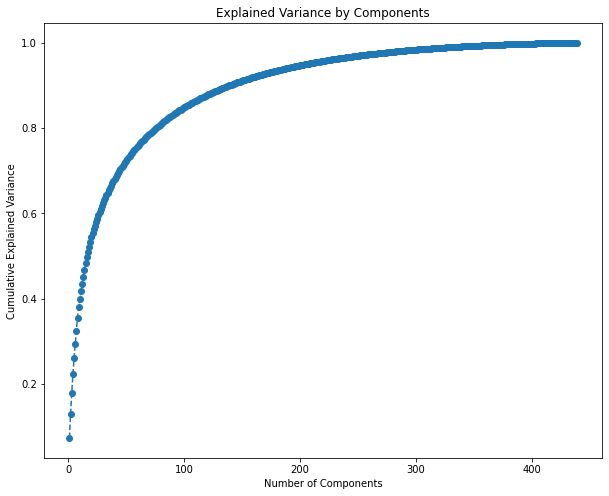

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_PCA_vectors)

pca = PCA()
pca.fit(segmentation_std)

plt.figure(figsize=(10,8))
plt.plot(range(1,440), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle = '--')
plt.title('Explained Variance by Components') 
plt.xlabel('Number of Components') 
plt.ylabel('Cumulative Explained Variance') 

noComponents = 0 # 0.9 is our baseline
for element in np.cumsum(pca.explained_variance_ratio_):
  noComponents = noComponents + 1
  if element >= 0.9:
    break
print(noComponents)

In [13]:
pca = PCA(n_components=noComponents)

pca.fit(segmentation_std)

pca.transform(segmentation_std)

scores_pca = pca.transform(segmentation_std)

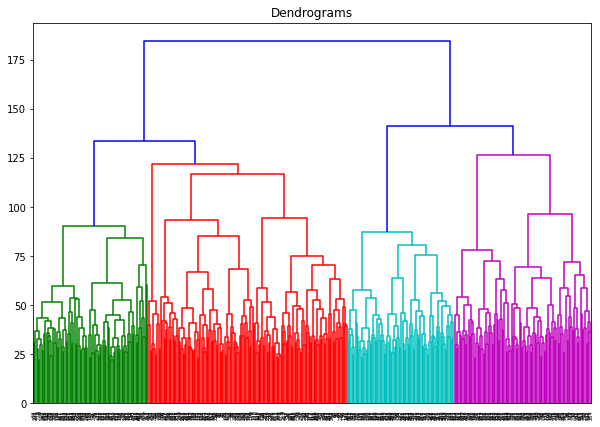

In [14]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scores_pca, method='ward'))

In [15]:
#TRYING FOUR CLUSTERS
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(scores_pca)
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
labels
print(len(labels))

439


Cluster: 0
Titles


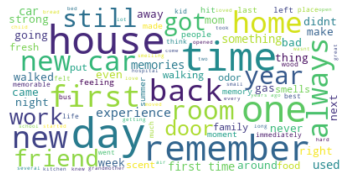

Cluster: 1
Titles


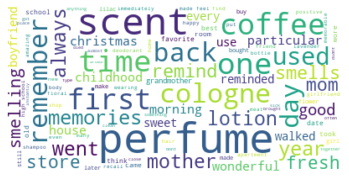

Cluster: 2
Titles


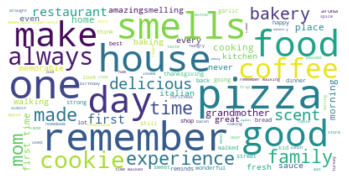

Cluster: 3
Titles


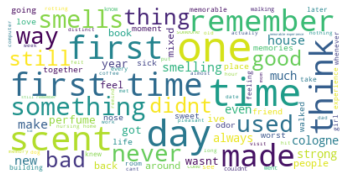

Cluster: 4
Titles


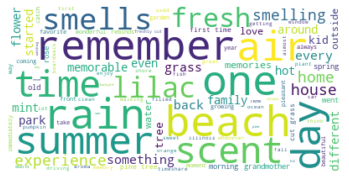

In [16]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,5):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word.strip() for word in text.split() if word != "smell" and word != "smelled" and word != "really"])

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    text = "ELMO_HCA_PCA" + str(k) + ".png"
    plt.savefig(text)
    plt.show()

In [17]:
labels
import csv
with open('clusters_4_ELMO_with_PCA.csv', mode='w') as clusters:
  cluster_writer = csv.writer(clusters, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  for story_index, label in enumerate(labels): 
    cluster_writer.writerow([df_stories.iloc[story_index][0], label])

# Evaluation


In [18]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [19]:
labels_withoutPCA = cluster.fit_predict(data_scaled)
labels_withPCA = cluster.fit_predict(scores_pca)

##Silhouette Coefficient

### Without PCA

In [26]:
silhouette_vals = silhouette_samples(data_scaled, labels_withoutPCA)
avg_score = np.mean(silhouette_vals)
print(avg_score)

0.030868165470961977


### With PCA

In [27]:
silhouette_vals = silhouette_samples(scores_pca, labels_withPCA)
avg_score = np.mean(silhouette_vals)
print(avg_score)

0.027744866047784925


##Calinski-Harabasz Index

### Without PCA

In [22]:
calinski_harabasz_val = calinski_harabasz_score(data_scaled, labels_withoutPCA)


### With PCA

In [28]:
calinski_harabasz_val = calinski_harabasz_score(scores_pca, labels_withPCA)
print(calinski_harabasz_val)

13.23165303256513


##Davies-Bouldin Index

### Without PCA

In [24]:
davies_bouldin_val = davies_bouldin_score(data_scaled, labels_withoutPCA)

### With PCA

In [29]:
davies_bouldin_val = davies_bouldin_score(scores_pca, labels_withPCA)
print(davies_bouldin_val)

4.071037778473899
